## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [485]:
df = pd.read_csv('Animal_Shelter_Intake_and_Outcome.csv')

In [246]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [486]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Zip Codes
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K19-031710,EUTH,A384994,03/17/2019,03/17/2019,0,QUARANTINE,FLD_STRAY,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,*SEBASTOPOL,NaN,NaN,NaN,1,NaN
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,NaN,K18-028341,CI01,A372719,05/21/2018,05/21/2018,0,STRAY,FIELD,EUTHANIZE,ILL SEVERE,TREATABLE/REHAB,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,NaN
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,K19-031717,EUTH,A385008,03/18/2019,03/19/2019,1,QUARANTINE,FLD_STRAY,EUTHANIZE,FRA,UNTREATABLE,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,NaN
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,05/15/2010,K18-028261,CS06,A372551,05/15/2018,05/22/2018,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1,NaN
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,09/04/2005,K18-029713,SMM,A375772,09/04/2018,09/08/2018,4,STRAY,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNTREATABLE,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,NaN


# Data Cleaning

In [248]:
df.describe()

,Days in Shelter,Outcome Zip Code,Count,Zip Codes
count,16792.000000,14341.000000,16792.0,14317.000000
mean,16.928299,95084.138345,1.0,23277.912202
std,28.318046,3434.425562,0.0,8914.184989
min,0.000000,1922.000000,1.0,54.000000
25%,1.000000,95401.000000,1.0,23755.000000
50%,8.000000,95404.000000,1.0,26078.000000
75%,21.000000,95436.000000,1.0,26080.000000
max,791.000000,99701.000000,1.0,32143.000000


In [249]:
df['Outcome Type'].value_counts()

RETURN TO OWNER    5601
ADOPTION           5597
TRANSFER           2829
EUTHANIZE          2431
DIED                117
DISPOSAL             98
ESCAPED/STOLEN       13
Name: Outcome Type, dtype: int64

In [7]:
df.columns

Index(['Name', 'Type', 'Breed', 'Color', 'Sex', 'Size', 'Date Of Birth',
       'Impound Number', 'Kennel Number', 'Animal ID', 'Intake Date',
       'Outcome Date', 'Days in Shelter', 'Intake Type', 'Intake Subtype',
       'Outcome Type', 'Outcome Subtype', 'Intake Condition',
       'Outcome Condition', 'Intake Jurisdiction', 'Outcome Jurisdiction',
       'Outcome Zip Code', 'Location', 'Count', 'Zip Codes'],
      dtype='object')

In [487]:
df.drop(['Outcome Date','Outcome Subtype','Outcome Condition','Outcome Jurisdiction','Outcome Zip Code','Location', 'Count'],axis=1, inplace=True)

### Looking at null values

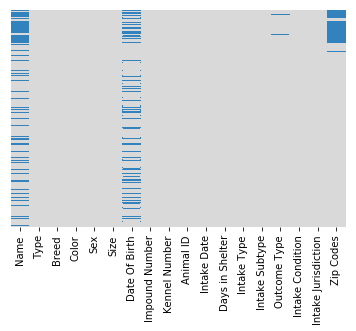

In [9]:
#Can probably drop name
#Need to figure out what to do with no DOB
#Drop unknown outcome types
#Use Intake Jurisdiction rather than Zip Codes
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')

In [251]:
df['Date Of Birth'].isnull().sum()

3945

In [252]:
df[df['Outcome Type'].isnull()]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes
26,NaN,OTHER,PONY,BROWN/BLACK,Neutered,X-LRG,NaN,K18-030969,CHANGE,A382149,12/22/2018,0,STRAY,FIELD,NaN,UNKNOWN,COUNTY,NaN
38,*TERRA,DOG,PIT BULL,TAN/WHITE,Female,LARGE,NaN,K19-031595,DS76,A384702,03/04/2019,0,STRAY,FIELD,NaN,UNKNOWN,COUNTY,NaN
71,NaN,OTHER,CHICKEN,RED/BLACK,Male,MED,NaN,K18-028791,FREEZER,A374259,06/25/2018,0,CONFISCATE,FLD_CRUEL,NaN,UNKNOWN,COUNTY,NaN
103,MILO,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,PUPPY,08/22/2018,K19-031702,NaN,A384724,03/15/2019,0,OWNER SURRENDER,OVER THE COUNTER,NaN,TREATABLE/REHAB,SANTA ROSA,NaN
112,NaN,DOG,DOBERMAN PINSCH,BLACK/TAN,Male,LARGE,05/04/2017,K19-032116,DS78,A386759,05/04/2019,0,STRAY,OVER THE COUNTER,NaN,UNKNOWN,SANTA ROSA,NaN
130,NaN,OTHER,CHICKEN,RED/BLACK,Male,MED,NaN,K18-028790,FREEZER,A374258,06/25/2018,0,CONFISCATE,FLD_CRUEL,NaN,UNKNOWN,COUNTY,NaN
190,KENNY,DOG,PIT BULL/MIX,BLACK/WHITE,Neutered,MED,11/09/2008,K19-031260,DA26,A383934,01/23/2019,0,CONFISCATE,FLD_ARREST,NaN,TREATABLE/MANAGEABLE,SANTA ROSA,NaN
196,NaN,DOG,PIT BULL,GRAY,Male,MED,NaN,K19-032110,DS68,A386741,05/03/2019,0,STRAY,FIELD,NaN,UNKNOWN,SANTA ROSA,NaN
199,*MOXIE,DOG,BORDER COLLIE,BLACK/WHITE,Female,MED,02/11/2012,K18-027246,NaN,A368067,02/10/2018,0,CONFISCATE,FLD_CRUEL,NaN,UNKNOWN,COUNTY,NaN
265,NaN,OTHER,HORSE,BROWN,Unknown,X-LRG,NaN,K19-031828,CHANGE,A385914,03/31/2019,0,STRAY,FIELD,NaN,HEALTHY,SANTA ROSA,NaN


In [488]:
df.drop(list(df[df['Outcome Type'].isnull()].index), inplace=True)

### Dropping some outcomes 

In [489]:
# Dropping outcomes with very few data points
xoutcomes = df[(df['Outcome Type'] == 'DISPOSAL')|(df['Outcome Type'] == 'DIED')|(df['Outcome Type'] == 'ESCAPED/STOLEN')]

In [490]:
df.drop(list(xoutcomes.index), inplace=True)

In [491]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K19-031710,EUTH,A384994,03/17/2019,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,NaN
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,NaN,K18-028341,CI01,A372719,05/21/2018,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,NaN
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,K19-031717,EUTH,A385008,03/18/2019,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,05/15/2010,K18-028261,CS06,A372551,05/15/2018,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,NaN
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,09/04/2005,K18-029713,SMM,A375772,09/04/2018,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN


In [492]:
df['Outcome Type'].value_counts()

RETURN TO OWNER    5601
ADOPTION           5597
TRANSFER           2829
EUTHANIZE          2431
Name: Outcome Type, dtype: int64

In [493]:
df['Type'].value_counts()

DOG      9416
CAT      5805
OTHER    1237
Name: Type, dtype: int64

In [619]:
df.drop(['Zip Codes', 'Impound Number', 'Kennel Number'], axis=1, inplace = True)

## Cleaning Breed

In [132]:
df['Breed'].nunique()

867

### Dog Breeds

In [494]:
df[df['Type']=='DOG'].groupby('Breed')['Type'].count()

Breed
AFFENPINSCHER                         4
AFFENPINSCHER/MIX                     1
AIREDALE TERR                         1
AIREDALE TERR/MIX                     1
AKBASH                                7
AKBASH/GREAT PYRENEES                 2
AKBASH/MIX                            4
AKITA                                16
AKITA/ALASKAN HUSKY                   1
AKITA/ANATOL SHEPHERD                 1
AKITA/CHOW CHOW                       2
AKITA/GERM SHEPHERD                   3
AKITA/LABRADOR RETR                  11
AKITA/MIX                             6
ALASK MALAMUTE                       10
ALASK MALAMUTE/MIX                    1
ALASKAN HUSKY                        42
ALASKAN HUSKY/ALASK MALAMUTE          1
ALASKAN HUSKY/AUST SHEPHERD           1
ALASKAN HUSKY/BEAGLE                  1
ALASKAN HUSKY/BORDER COLLIE           2
ALASKAN HUSKY/GERM SHEPHERD           8
ALASKAN HUSKY/MIX                     9
ALASKAN HUSKY/PIT BULL                1
ALASKAN HUSKY/SHIBA INU           

In [495]:
df[df['Type']=='CAT'].groupby('Breed')['Type'].count()

Breed
ABYSSINIAN                    1
ABYSSINIAN/MIX                4
AMER SH/MIX                   1
BALINESE/JAVANESE             1
BENGAL                        8
BENGAL/DOMESTIC SH            2
BENGAL/MIX                    1
BRITISH SH                    1
BURMESE                       2
DOMESTIC LH                 473
DOMESTIC LH/MAINE COON        3
DOMESTIC LH/MANX              1
DOMESTIC LH/SIAMESE           1
DOMESTIC MH                 519
DOMESTIC MH/DOMESTIC LH       1
DOMESTIC SH                4463
DOMESTIC SH/DOMESTIC SH       1
DOMESTIC SH/MAINE COON        1
DOMESTIC SH/MIX               3
EGYPTIAN MAU/MIX              1
EXOTIC SH                     1
HIMALAYAN                    15
HIMALAYAN/MIX                 8
HIMALAYAN/PERSIAN             1
MAINE COON                    1
MAINE COON/MIX                1
MANX                         16
MANX/MIX                      4
MUNCHKIN SH                   1
OCICAT                        1
PERSIAN                       7
PE

In [496]:
df['PredomBreed'] = df['Breed'].apply(lambda x: x.split('/')[0])

In [497]:
df['PredomBreed'].unique()

array(['BAT', 'DOMESTIC SH', 'DOMESTIC MH', 'ROTTWEILER', 'PIT BULL',
       'GERM SHEPHERD', 'CHICKEN', 'DOMESTIC LH', 'SIAMESE',
       'CHIHUAHUA SH', 'PARSON RUSS TER', 'PLOTT HOUND', 'CATAHOULA',
       'SIBERIAN HUSKY', 'BORDER COLLIE', 'LHASA APSO', 'CHIHUAHUA LH',
       'SHIH TZU', 'ALASKAN HUSKY', 'POODLE MIN', 'LABRADOR RETR',
       'RAT TERRIER', 'QUEENSLAND HEEL', 'GREAT PYRENEES', 'RACCOON',
       'POMERANIAN', 'AUST CATTLE DOG', 'RABBIT SH', 'KOI',
       'YORKSHIRE TERR', 'ENG SPRNGR SPAN', 'AKITA', 'BOXER',
       'CAVALIER SPAN', 'BELG MALINOIS', 'CAIRN TERRIER', 'SQUIRREL',
       'BEAGLE', 'HIMALAYAN', 'GOOSE', 'PEAFOWL', 'WEIMARANER', 'SHEEP',
       'MOUSE', 'POTBELLY PIG', 'MALTESE', 'AMER BULLDOG',
       'CHINESE SHARPEI', 'HORSE', 'DOBERMAN PINSCH', 'CALIFORNIAN',
       'PIGEON', 'BICHON FRISE', 'PUG', 'LOP-MINI', 'AMERICAN STAFF',
       'ITAL GREYHOUND', 'AUST KELPIE', 'JINDO', 'AMER ESKIMO', 'MANX',
       'RAT', 'FOX TERR SMOOTH', 'LOP-FRENCH', 'TR WALK

In [498]:
df['PredomBreed'].nunique()

273

In [499]:
df.groupby('PredomBreed').count()['Type'].sort_values()

PredomBreed
IRISH WOLFHOUND       1
NORW BUHUND           1
COTON DE TULEAR       1
COCKATOO              1
OCICAT                1
OLD ENG BULLDOG       1
CHIHUAHUA & MIX       1
HARRIER               1
DEGU                  1
PITT BULL & LAB       1
PRESA CANARIO         1
PYGMY                 1
QUAIL                 1
REX-MINI              1
BRITISH SH            1
RHODE ISLAND          1
RHODESIAN RIDGE       1
POLISH                1
BOERBOEL              1
NETHERLND DWARF       1
MUNCHKIN SH           1
HERON                 1
IBIZAN HOUND          1
GR SWISS MTN          1
JAPANESE CHIN         1
JINDO                 1
KOMONDOR              1
LABRADOR & GOLD       1
MUSCOVY               1
LEGHORN               1
FERRET                1
EXOTIC SH             1
LLAMA                 1
MACAW                 1
EGYPTIAN MAU          1
MIX                   1
MULE                  1
LILAC                 1
BOER                  1
HARLEQUIN             1
SPANISH MASTIFF       1
THOR

In [500]:
df[df['PredomBreed']== 'BORDER COLLIE X']

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed
6320,PARKER,DOG,BORDER COLLIE X,UNKNOWN,Spayed,MED,04/20/2014,K15-012457,TRUCK,A333548,01/16/2015,0,STRAY,FIELD,RETURN TO OWNER,HEALTHY,COUNTY,26080.0,BORDER COLLIE X
7970,PARKER,DOG,BORDER COLLIE X,UNKNOWN,Spayed,MED,04/20/2014,K15-012462,DA34,A333548,01/17/2015,4,OWNER SURRENDER,FIELD,ADOPTION,HEALTHY,COUNTY,26080.0,BORDER COLLIE X


In [501]:
df.drop(6320, inplace = True)

In [502]:
df.loc[7970,'PredomBreed'] = 'BORDER COLLIE'
# 'BORDER COLLIE X'

In [503]:
df[df['PredomBreed']== 'LABRADOR & GOLD']

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed
16583,BUBBA,DOG,LABRADOR & GOLD,YELLOW,Male,NaN,03/03/2018,K19-031298,TRUCK,A378258,01/26/2019,0,STRAY,FIELD,RETURN TO OWNER,UNKNOWN,SANTA ROSA,26076.0,LABRADOR & GOLD


In [504]:
df.loc[16583,'PredomBreed']= 'LABRADOR RETR'

In [505]:
df.loc[13251,'PredomBreed']= 'PIT BULL'

In [506]:
df[df['PredomBreed'].str.contains('LOP')]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed
544,NaN,OTHER,LOP-MINI,WHITE/TAN,Male,SMALL,NaN,K17-024601,CS06,A356211,07/27/2017,5,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN,LOP-MINI
666,NaN,OTHER,LOP-FRENCH,BLACK,Male,SMALL,NaN,K15-015769,COOLER,A326558,09/02/2015,0,STRAY,FIELD,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN,LOP-FRENCH
679,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015899,CS06,A326861,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
915,NaN,OTHER,LOP-FRENCH,TAN/BLACK,Male,SMALL,NaN,K18-026952,CA03,A366737,01/09/2018,9,STRAY,FIELD,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-FRENCH
1007,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015901,CS06,A326863,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1226,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015900,CS06,A326862,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1592,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015902,CS06,A326865,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1611,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015897,MISSING,A326859,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1703,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015898,CS06,A326860,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
2861,BOO,OTHER,LOP-MINI,BLACK,Spayed,SMALL,09/23/2011,K14-010895,CA01,A311883,09/20/2014,31,STRAY,OVER THE COUNTER,ADOPTION,HEALTHY,SANTA ROSA,31016.0,LOP-MINI


In [507]:
df[df['PredomBreed'].str.contains('-')]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed
544,NaN,OTHER,LOP-MINI,WHITE/TAN,Male,SMALL,NaN,K17-024601,CS06,A356211,07/27/2017,5,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN,LOP-MINI
666,NaN,OTHER,LOP-FRENCH,BLACK,Male,SMALL,NaN,K15-015769,COOLER,A326558,09/02/2015,0,STRAY,FIELD,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN,LOP-FRENCH
679,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015899,CS06,A326861,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
915,NaN,OTHER,LOP-FRENCH,TAN/BLACK,Male,SMALL,NaN,K18-026952,CA03,A366737,01/09/2018,9,STRAY,FIELD,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-FRENCH
1007,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015901,CS06,A326863,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1100,NaN,OTHER,ANGORA-FRENCH/FLEMISH GIANT,WHITE,Unknown,SMALL,NaN,K18-026924,CS06,A366678,01/05/2018,1,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,COUNTY,NaN,ANGORA-FRENCH
1226,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015900,CS06,A326862,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1592,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015902,CS06,A326865,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1611,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015897,MISSING,A326859,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI
1703,NaN,OTHER,LOP-MINI,BROWN/WHITE,Unknown,SMALL,NaN,K15-015898,CS06,A326860,09/07/2015,3,STRAY,BORN_HERE,EUTHANIZE,UNTREATABLE,COUNTY,NaN,LOP-MINI


In [508]:
df['PredomBreed'] = df['PredomBreed'].apply(lambda x: x.split('-')[0])

In [509]:
df[df['PredomBreed'] == 'RHODESIAN RIDGE']

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed
10632,LEROY,DOG,RHODESIAN RIDGE,TAN,Neutered,MED,NaN,K16-019389,DS78,A357872,06/23/2016,12,STRAY,FIELD,RETURN TO OWNER,HEALTHY,COUNTY,23747.0,RHODESIAN RIDGE


In [510]:
df.loc[10632,'PredomBreed'] = 'RHOD RIDGEBACK'

In [511]:
for i in df[df['PredomBreed'].str.contains('CHIHUAHUA')].index:
    df.loc[i, 'PredomBreed'] = 'CHIHUAHUA'

In [512]:
for i in df[df['PredomBreed'].str.contains('PIT BULL')].index:
    df.loc[i, 'PredomBreed'] = 'PIT BULL'

In [513]:
for i in df[df['PredomBreed'].str.contains('BULLDOG')].index:
    df.loc[i,'PredomBreed'] = 'BULLDOG'

In [514]:
for i in df[df['PredomBreed'].str.contains('FOX TERR')].index:
    df.loc[i,'PredomBreed'] = 'FOX TERRIER'

In [515]:
for i in df[df['PredomBreed'].str.contains('DACHSHUND')].index:
    df.loc[i,'PredomBreed'] = 'DACHSHUND'

In [516]:
for i in df[df['PredomBreed'].str.contains('CORGI')].index:
    df.loc[i,'PredomBreed'] = 'CORGI'

In [517]:
for i in df[df['PredomBreed'].str.contains('ST BERNARD')].index:
    df.loc[i,'PredomBreed'] = 'ST BERNARD'

In [518]:
for i in df[df['PredomBreed'].str.contains('POODLE')].index:
    df.loc[i,'PredomBreed'] = 'POODLE'

In [519]:
for i in df[df['PredomBreed'].str.contains('GREYHOUND')].index:
    df.loc[i,'PredomBreed'] = 'GREYHOUND'

In [520]:
for i in df[df['PredomBreed'].str.contains('SCHNAUZER')].index:
    df.loc[i,'PredomBreed'] = 'SCHNAUZER'

In [521]:
df[df['PredomBreed']=='BELGIAN MALINOI']

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed
9867,MOCHA,DOG,BELGIAN MALINOI,BROWN,Female,NaN,09/02/2017,K18-027706,TRUCK,A367647,03/31/2018,0,STRAY,FIELD,RETURN TO OWNER,UNKNOWN,COUNTY,26079.0,BELGIAN MALINOI


In [522]:
df.loc[9867,'PredomBreed'] = 'BELG MALINOIS'

In [523]:
df['PredomBreed'].nunique()

243

In [524]:
sorted(df[df['Type']=='DOG']['PredomBreed'].unique())

['AFFENPINSCHER',
 'AIREDALE TERR',
 'AKBASH',
 'AKITA',
 'ALASK MALAMUTE',
 'ALASKAN HUSKY',
 'AMER ESKIMO',
 'AMER FOXHOUND',
 'AMERICAN STAFF',
 'ANATOL SHEPHERD',
 'AUST CATTLE DOG',
 'AUST KELPIE',
 'AUST SHEPHERD',
 'AUST TERRIER',
 'BASENJI',
 'BASSET HOUND',
 'BEAGLE',
 'BEARDED COLLIE',
 'BELG MALINOIS',
 'BELG TERVUREN',
 'BICHON FRISE',
 'BLACK',
 'BLACK MOUTH CUR',
 'BLOODHOUND',
 'BLUETICK HOUND',
 'BOERBOEL',
 'BORDER COLLIE',
 'BORDER TERRIER',
 'BOSTON TERRIER',
 'BOUV FLANDRES',
 'BOXER',
 'BRITTANY',
 'BRUSS GRIFFON',
 'BULL TERRIER',
 'BULLDOG',
 'BULLMASTIFF',
 'CAIRN TERRIER',
 'CANE CORSO',
 'CAROLINA DOG',
 'CATAHOULA',
 'CAVALIER SPAN',
 'CHESA BAY RETR',
 'CHIHUAHUA',
 'CHINESE CRESTED',
 'CHINESE SHARPEI',
 'CHOW CHOW',
 'COCKER SPAN',
 'COLLIE ROUGH',
 'COLLIE SMOOTH',
 'CORGI',
 'COTON DE TULEAR',
 'DACHSHUND',
 'DALMATIAN',
 'DOBERMAN PINSCH',
 'DOGUE DE BORDX',
 'DUTCH SHEPHERD',
 'ENG COONHOUND',
 'ENG FOXHOUND',
 'ENG POINTER',
 'ENG SETTER',
 'ENG SPRNG

In [525]:
df[df['Type']=='DOG'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False).head(35).sum()

8426

In [376]:
df[df['Type']=='DOG'].groupby('PredomBreed')['Type'].count().describe()

count     140.000000
mean       67.250000
std       228.198832
min         1.000000
25%         3.000000
50%         9.500000
75%        44.500000
max      1971.000000
Name: Type, dtype: float64

In [409]:
#about 12% of dogs will be 'other'
989/8426

0.11737479230951815

In [526]:
top_dog_breeds = df[df['Type']=='DOG'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False).head(35)

In [527]:
other_dogs = df[df['Type']=='DOG'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False).tail(105).index

In [528]:
for i in df[df['PredomBreed'].isin(other_dogs)].index:
    df.loc[i,'PredomBreed'] = 'OTHER'

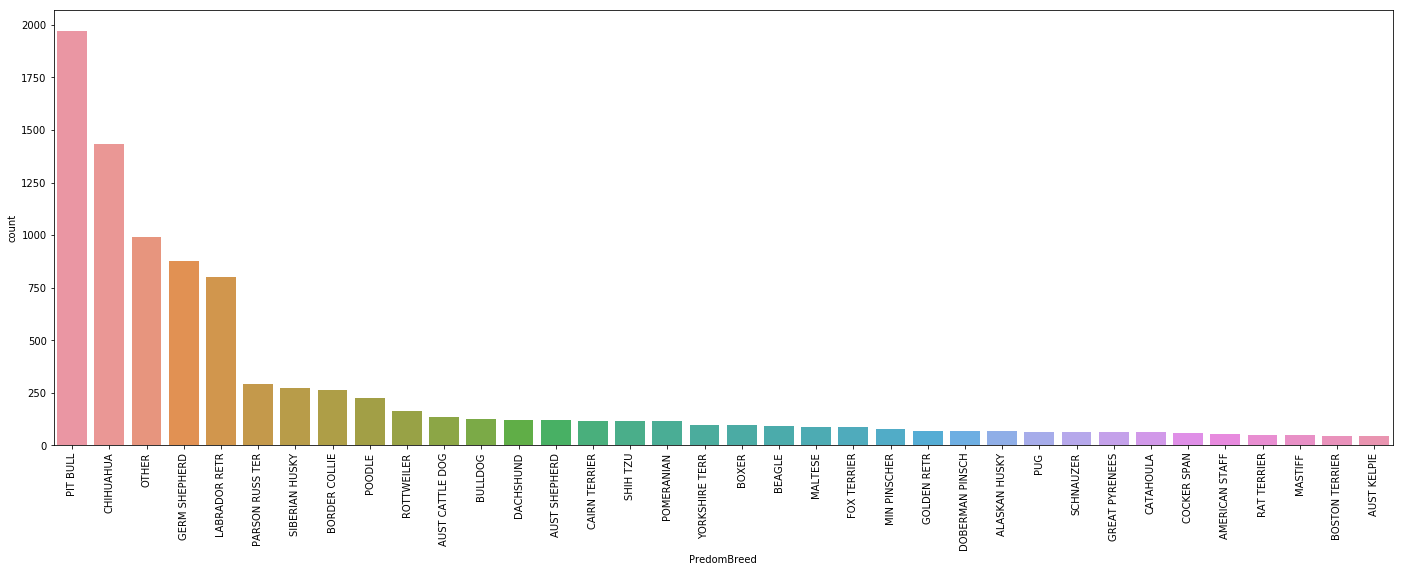

In [529]:
plt.figure(figsize=(24,8))
plt.xticks(rotation=90)
sns.countplot(data = df[df['Type'] == 'DOG'], x='PredomBreed', order = df[df['Type']=='DOG'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False).index)

In [530]:
df[df['Type']=='DOG'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False)

PredomBreed
PIT BULL           1971
CHIHUAHUA          1433
OTHER               989
GERM SHEPHERD       878
LABRADOR RETR       802
PARSON RUSS TER     291
SIBERIAN HUSKY      271
BORDER COLLIE       262
POODLE              223
ROTTWEILER          161
AUST CATTLE DOG     132
BULLDOG             124
DACHSHUND           122
AUST SHEPHERD       122
CAIRN TERRIER       117
SHIH TZU            117
POMERANIAN          115
YORKSHIRE TERR       97
BOXER                95
BEAGLE               91
MALTESE              88
FOX TERRIER          85
MIN PINSCHER         75
GOLDEN RETR          68
DOBERMAN PINSCH      68
ALASKAN HUSKY        66
PUG                  64
SCHNAUZER            64
GREAT PYRENEES       63
CATAHOULA            61
COCKER SPAN          56
AMERICAN STAFF       55
RAT TERRIER          50
MASTIFF              47
BOSTON TERRIER       46
AUST KELPIE          46
Name: Type, dtype: int64

### Cat Breeds

In [531]:
top_cat_breeds = df[df['Type']=='CAT'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False)

In [383]:
top_cat_breeds

PredomBreed
DOMESTIC SH       4468
DOMESTIC MH        520
DOMESTIC LH        478
SIAMESE            236
HIMALAYAN           24
MANX                20
SNOWSHOE            13
BENGAL              11
PERSIAN              9
ABYSSINIAN           5
TURKISH VAN          3
MAINE COON           2
TURKISH ANGORA       2
RUSSIAN BLUE         2
SAVANNAH             2
BURMESE              2
MUNCHKIN SH          1
EXOTIC SH            1
EGYPTIAN MAU         1
OCICAT               1
BRITISH SH           1
SCOTTISH FOLD        1
BALINESE             1
AMER SH              1
Name: Type, dtype: int64

In [532]:
other_cats = top_cat_breeds.tail(20).index

In [533]:
for i in df[df['PredomBreed'].isin(other_cats)].index:
    df.loc[i,'PredomBreed'] = 'OTHER'


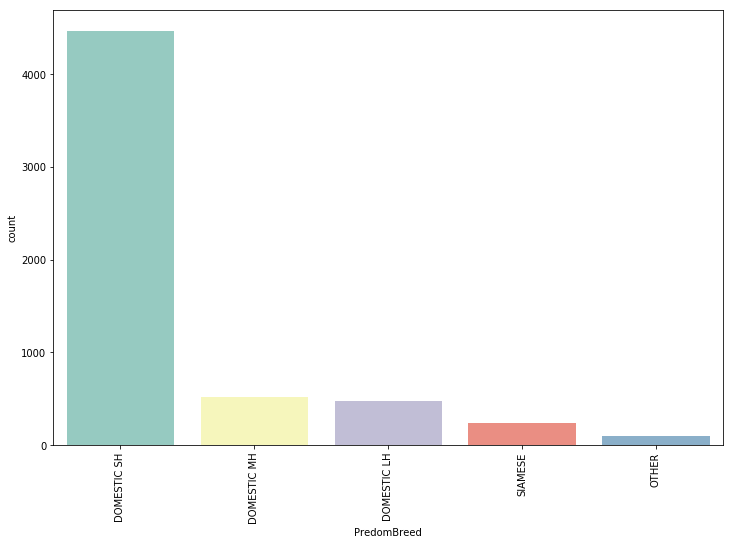

In [534]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(data = df[df['Type']=='CAT'], x='PredomBreed', palette='Set3')

In [535]:
df[df['Type']=='CAT'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False)

PredomBreed
DOMESTIC SH    4468
DOMESTIC MH     520
DOMESTIC LH     478
SIAMESE         236
OTHER           103
Name: Type, dtype: int64

### Other Breeds

In [536]:
for i in df[df['PredomBreed'].str.contains('RABBIT')].index:
    df.loc[i,'PredomBreed'] = 'RABBIT'

In [537]:
for i in df[df['PredomBreed'].str.contains('POTBELLY PIG')].index:
    df.loc[i,'PredomBreed'] = 'PIG'

In [538]:
other_breeds = pd.DataFrame(df[df['Type']=='OTHER'].groupby('PredomBreed')['Type'].count().sort_values(ascending = False), copy = True).reset_index()

In [539]:
other_breeds.describe()

,Type
count,78.000000
mean,15.858974
std,42.445909
min,1.000000
25%,1.000000
50%,2.500000
75%,11.250000
max,278.000000


In [540]:
other_breeds['Type'].sum()*.85

1051.45

In [541]:
other_other = list(other_breeds['PredomBreed'].tail(61))

In [542]:
for i in df[df['PredomBreed'].isin(other_other)].index:
    df.loc[i,'PredomBreed'] = 'OTHER'

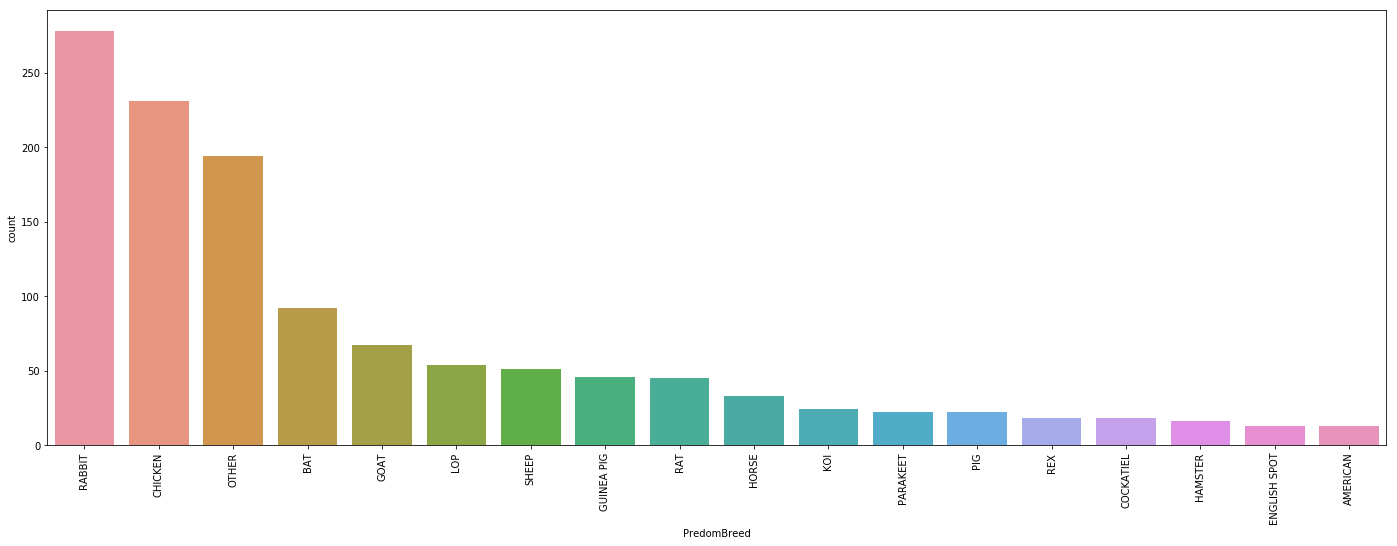

In [543]:
plt.figure(figsize=(24,8))
plt.xticks(rotation=90)
sns.countplot(data = df[df['Type']=='OTHER'], x='PredomBreed', order = df[df['Type']=='OTHER'].groupby('PredomBreed')['Type'].count().sort_values(ascending=False).index)

In [544]:
df['PredomBreed'].nunique()

57

## Cleaning Color

In [545]:
df['Color'].nunique()

290

In [546]:
df.groupby('Color')['Type'].count()

Color
AGOUTI                     58
APRICOT                    13
BL BRINDLE                 36
BL BRINDLE/BLACK            1
BL BRINDLE/GRAY             2
BL BRINDLE/WHITE           46
BLACK                    1659
BLACK/BL BRINDLE            2
BLACK/BLACK                21
BLACK/BLK SMOKE             1
BLACK/BLK TABBY             2
BLACK/BLUE                  1
BLACK/BLUE MERLE            3
BLACK/BLUE TICK             2
BLACK/BR BRINDLE            7
BLACK/BRN MERLE             1
BLACK/BROWN               249
BLACK/CHOCOLATE             1
BLACK/CREAM                 1
BLACK/GOLD                  2
BLACK/GRAY                 50
BLACK/ORANGE                2
BLACK/RED                  14
BLACK/SILVER                1
BLACK/TAN                 724
BLACK/TRICOLOR              9
BLACK/WHITE              1806
BLK SMOKE                  21
BLK SMOKE/WHITE             3
BLK TABBY                  47
BLK TABBY/GRAY              1
BLK TABBY/GRAY TIGER        1
BLK TABBY/TORTIE            1
BLK 

In [547]:
df['PredomColor'] = df['Color'].apply(lambda x: x.split('/')[0])

In [548]:
for i in df[df['PredomColor'].str.contains('BLK')].index:
    df.loc[i,'PredomColor'] = 'BLACK'

In [551]:
for i in df[df['PredomColor'].str.contains('BLUE')].index:
    df.loc[i,'PredomColor'] = 'BLUE'

In [557]:
for i in df[df['PredomColor'].str.contains('BRN')].index:
    df.loc[i,'PredomColor'] = 'BROWN'

In [560]:
for i in df[df['PredomColor'].str.contains('GRAY')].index:
    df.loc[i,'PredomColor'] = 'GRAY'

In [561]:
for i in df[df['PredomColor'].str.contains('ORG')].index:
    df.loc[i,'PredomColor'] = 'ORANGE'

In [562]:
for i in df[df['PredomColor'].str.contains('RED')].index:
    df.loc[i,'PredomColor'] = 'RED'

In [563]:
for i in df[df['PredomColor'].str.contains('SLVR')].index:
    df.loc[i,'PredomColor'] = 'SILVER'

In [566]:
for i in df[df['PredomColor'].str.contains('Y BRINDLE')].index:
    df.loc[i,'PredomColor'] = 'YELLOW'

In [567]:
for i in df[df['PredomColor'].str.contains('CALICO PT')].index:
    df.loc[i,'PredomColor'] = 'CALICO'

In [568]:
for i in df[df['PredomColor'].str.contains('CHOC PT')].index:
    df.loc[i,'PredomColor'] = 'CHOCOLATE'

In [571]:
for i in df[df['PredomColor'].str.contains('CRM')].index:
    df.loc[i,'PredomColor'] = 'CREAM'

In [574]:
for i in df[df['PredomColor'].str.contains('LIVER')].index:
    df.loc[i,'PredomColor'] = 'LIVER'

In [580]:
for i in df[df['PredomColor'].str.contains('LYNX')].index:
    df.loc[i,'PredomColor'] = 'LYNX'

In [583]:
for i in df[df['PredomColor'].str.contains('TORTIE')].index:
    df.loc[i,'PredomColor'] = 'TORTIE'

In [586]:
for i in df[df['PredomColor'].str.contains('BL BRINDLE')].index:
    df.loc[i,'PredomColor'] = 'BLACK'

In [587]:
for i in df[df['PredomColor'].str.contains('BR BRINDLE')].index:
    df.loc[i,'PredomColor'] = 'BROWN'

In [554]:
df[df['PredomColor']=='BLONDE']

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed,PredomColor
11914,REYNE,DOG,GOLDEN RETR,BLONDE,Spayed,NaN,NaN,K16-019550,TX,A032791,07/02/2016,3,CONFISCATE,FLD_CRUEL,RETURN TO OWNER,TREATABLE/MANAGEABLE,COUNTY,23498.0,GOLDEN RETR,BLONDE


In [555]:
df.loc[11914,'PredomColor'] = 'GOLD'

In [595]:
other_colors = df.groupby('PredomColor')['Type'].count().sort_values(ascending=False).tail(11).index

In [596]:
for i in df[df['PredomColor'].isin(other_colors)].index:
    df.loc[i,'PredomColor'] = 'OTHER'

In [597]:
df['PredomColor'].nunique()

20

## Cleaning Intake Age

In [599]:
type(df['Date Of Birth'][3])

str

In [600]:
df['Date Of Birth'][3]

'05/15/2010'

In [601]:
import datetime as dt

In [602]:
dt.datetime.strptime(df['Date Of Birth'][3],'%m/%d/%Y')

datetime.datetime(2010, 5, 15, 0, 0)

In [603]:
df['DOB'] = df['Date Of Birth'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y') if type(x)== str else float('nan'))

In [604]:
df['IntakeDate'] = df['Intake Date'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y') if type(x)== str else float('nan'))

In [605]:
df['IntakeAge'] = df['IntakeDate'] - df['DOB']

In [606]:
df['IntakeAgeYrs'] = df['IntakeAge'].apply(lambda x: round(x.days/365, 2))

In [607]:
df.drop(['Date Of Birth', 'Intake Date'], axis=1, inplace = True)

In [608]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Impound Number,Kennel Number,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,Zip Codes,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,K19-031710,EUTH,A384994,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,NaN,BAT,BROWN,NaT,2019-03-17,NaT,NaN
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,K18-028341,CI01,A372719,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,NaN,DOMESTIC SH,CREAM,NaT,2018-05-21,NaT,NaN
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,K19-031717,EUTH,A385008,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN,BAT,BLACK,NaT,2019-03-18,NaT,NaN
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,K18-028261,CS06,A372551,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,NaN,DOMESTIC MH,WHITE,2010-05-15,2018-05-15,2922 days,8.01
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,K18-029713,SMM,A375772,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,NaN,DOMESTIC SH,CALICO,2005-09-04,2018-09-04,4748 days,13.01


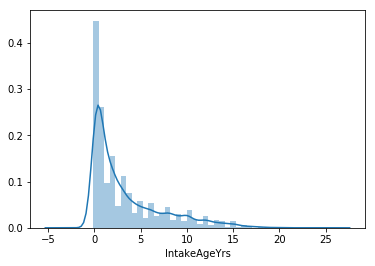

In [609]:
sns.distplot(df[df['IntakeAgeYrs'].notnull()]['IntakeAgeYrs'])

In [610]:
df['IntakeAgeYrs'].describe()

count    12680.000000
mean         3.382959
std          3.924841
min         -3.660000
25%          0.410000
50%          1.960000
75%          5.000000
max         25.950000
Name: IntakeAgeYrs, dtype: float64

In [625]:
for i in df[(df['IntakeAgeYrs']<0)&(df['Intake Subtype']!='BORN_HERE')].index:
    df.loc[i, 'IntakeAgeYrs'] = -1

In [614]:
for i in df[(df['IntakeAgeYrs'].isnull())&(df['Size']=='KITTN')].index:
    df.loc[i, 'IntakeAgeYrs'] = .5


In [616]:
for i in df[(df['IntakeAgeYrs'].isnull())&(df['Size']=='PUPPY')].index:
    df.loc[i, 'IntakeAgeYrs'] = .5

In [626]:
for i in df[(df['IntakeAgeYrs'].isnull())].index:
    df.loc[i, 'IntakeAgeYrs'] = -1

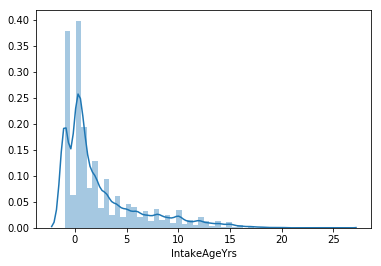

In [627]:
sns.distplot(df['IntakeAgeYrs'])

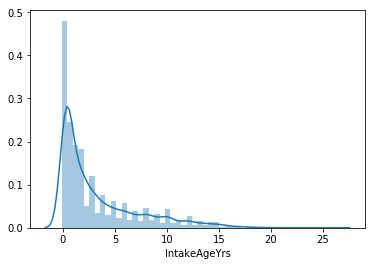

In [628]:
sns.distplot(df[df['IntakeAgeYrs']!= -1]['IntakeAgeYrs'])

In [632]:
px.box(df,x='Outcome Type',y='IntakeAgeYrs', color = 'Type')

In [634]:
df[df['IntakeAgeYrs']>20]

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
315,BLACK,CAT,DOMESTIC SH,BLACK,Female,SMALL,A383141,0,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,COUNTY,DOMESTIC SH,BLACK,1999-01-10,2019-01-10,7305 days,20.01
1381,BOOTSIE,CAT,DOMESTIC MH,BRN TABBY,Spayed,SMALL,A316794,8,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC MH,BROWN,1995-02-19,2015-02-17,7303 days,20.01
1386,NaN,CAT,DOMESTIC SH,BRN TABBY/WHITE,Spayed,SMALL,A332670,6,STRAY,FIELD,EUTHANIZE,UNTREATABLE,WINDSOR,DOMESTIC SH,BROWN,1996-02-03,2016-02-03,7305 days,20.01
1780,PUG,CAT,DOMESTIC SH,BUFF,Neutered,SMALL,A336103,17,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,BUFF,1996-04-27,2016-04-27,7305 days,20.01
4462,NaN,CAT,DOMESTIC LH,ORANGE/WHITE,Spayed,SMALL,A326286,0,STRAY,FIELD,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC LH,ORANGE,1991-09-01,2015-08-24,8758 days,23.99
5366,SALLY,OTHER,HORSE,BROWN/WHITE,Female,X-LRG,A331492,0,STRAY,FIELD,RETURN TO OWNER,HEALTHY,COUNTY,HORSE,BROWN,1992-01-02,2016-01-02,8766 days,24.02
7608,NIBBLES,OTHER,COCKATIEL,YELLOW/GREEN,Male,SMALL,A384084,15,OWNER SURRENDER,OVER THE COUNTER,ADOPTION,HEALTHY,COUNTY,COCKATIEL,YELLOW,1999-01-31,2019-01-29,7303 days,20.01
7688,GEORGE,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,A044353,0,STRAY,OVER THE COUNTER,RETURN TO OWNER,HEALTHY,SANTA ROSA,DOMESTIC SH,BROWN,1995-08-26,2015-08-26,7305 days,20.01
9147,RUDY,CAT,DOMESTIC MH,GRAY TABBY,Neutered,SMALL,A331404,4,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC MH,GRAY,1995-12-31,2015-12-29,7303 days,20.01
9780,NaN,OTHER,APPALOOSA,BROWN/WHITE,Neutered,X-LRG,A324593,26,STRAY,FIELD,TRANSFER,TREATABLE/REHAB,COUNTY,OTHER,BROWN,1989-08-17,2015-07-23,9471 days,25.95


In [621]:
df['Intake Subtype'].nunique()

24

In [618]:
df['Intake Jurisdiction'].nunique()

13

In [647]:
df[df['Size'].isnull()]

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
858,ACE,DOG,PIT BULL & MIX,GRAY,Neutered,NaN,A367595,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,UNKNOWN,SANTA ROSA,PIT BULL,GRAY,2012-12-13,2017-09-13,1735 days,4.75
1096,NaN,CAT,DOMESTIC SH,BRN TABBY,Spayed,NaN,A007213,0,OWNER SURRENDER,FIELD,EUTHANIZE,UNKNOWN,WINDSOR,DOMESTIC SH,BROWN,NaT,2018-04-28,NaT,-1.00
2571,LOLA,DOG,AMERICAN STAFF/PIT BULL,BLUE/WHITE,Female,NaN,A031601,24,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,COUNTY,AMERICAN STAFF,BLUE,NaT,2014-07-18,NaT,-1.00
2917,NaN,CAT,DOMESTIC SH,BLACK,Spayed,NaN,A067376,3,STRAY,FIELD,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,BLACK,1999-09-01,2017-06-19,6501 days,17.81
4060,WOLFGANG,DOG,POMERANIAN,WHITE/BROWN,Neutered,NaN,A015167,0,STRAY,FIELD,RETURN TO OWNER,UNKNOWN,SANTA ROSA,POMERANIAN,WHITE,2003-12-01,2019-01-28,5537 days,15.17
5145,RUBI,DOG,ROTTWEILER/MIX,BROWN,Spayed,NaN,A025472,54,CONFISCATE,FLD_CRUEL,RETURN TO OWNER,TREATABLE/REHAB,SANTA ROSA,ROTTWEILER,BROWN,2004-12-19,2015-05-28,3812 days,10.44
5275,PRESIDENTE,DOG,GERM SHEPHERD,BLACK/BROWN,Male,NaN,A024038,1,TRANSFER,VET_HOSP,RETURN TO OWNER,HEALTHY,COUNTY,GERM SHEPHERD,BLACK,NaT,2014-03-03,NaT,-1.00
6341,LICKY,DOG,BASSET HOUND/MIX,TRICOLOR,Spayed,NaN,A034766,2,STRAY,FIELD,RETURN TO OWNER,UNKNOWN,SANTA ROSA,OTHER,TRICOLOR,NaT,2018-02-08,NaT,-1.00
7949,CHLOE,DOG,LABRADOR RETR,YELLOW,Spayed,NaN,A034368,7,STRAY,FIELD,RETURN TO OWNER,HEALTHY,COUNTY,LABRADOR RETR,YELLOW,2006-06-01,2017-11-28,4198 days,11.50
8610,MUNCI,DOG,BEAGLE,TRICOLOR,Neutered,NaN,A012709,0,STRAY,FIELD,RETURN TO OWNER,TREATABLE/REHAB,WINDSOR,BEAGLE,TRICOLOR,2003-01-25,2016-06-02,4877 days,13.36


In [651]:
for i in df[df['Size'].isnull()].index:
    df.loc[i, 'Size'] = df[df['PredomBreed'] == df.loc[i, 'PredomBreed']].groupby('Size')['Type'].count().sort_values(ascending=False).index[0]

# EDA

## Distribution of Days in Shelter

In [635]:
#will keep in mind there are outliers here.  Will handle later
px.box(df,x='Outcome Type',y='Days in Shelter', color = 'Type')

In [637]:
px.box(df[df['Days in Shelter']<400],x='Outcome Type',y='Days in Shelter', color = 'Type')

## Outcome Type By: 

### Type

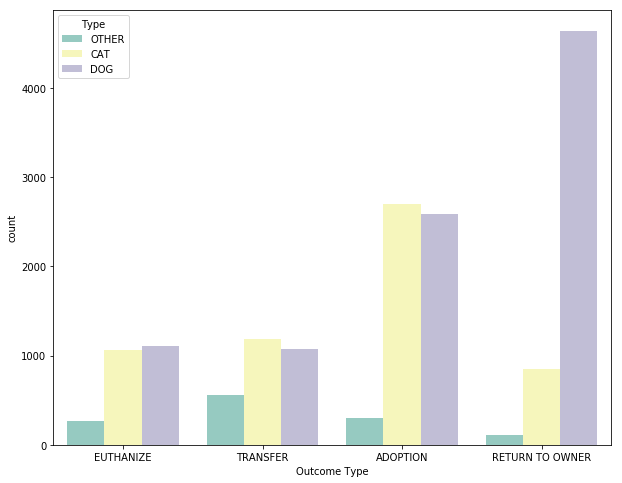

In [452]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Outcome Type', hue = 'Type',palette='Set3')

### Intake Type

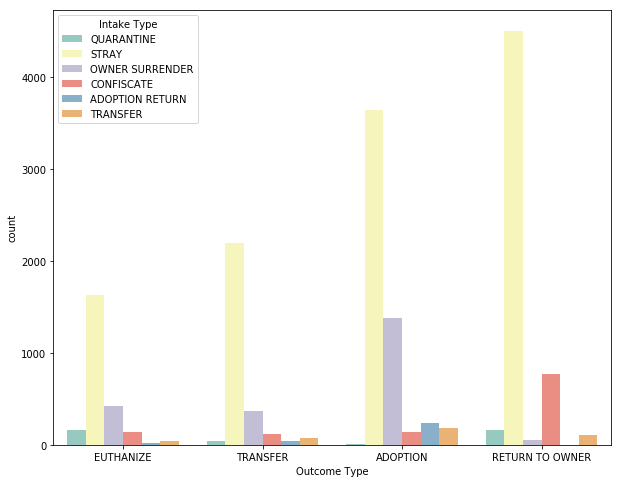

In [453]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Outcome Type', hue = 'Intake Type',palette='Set3')

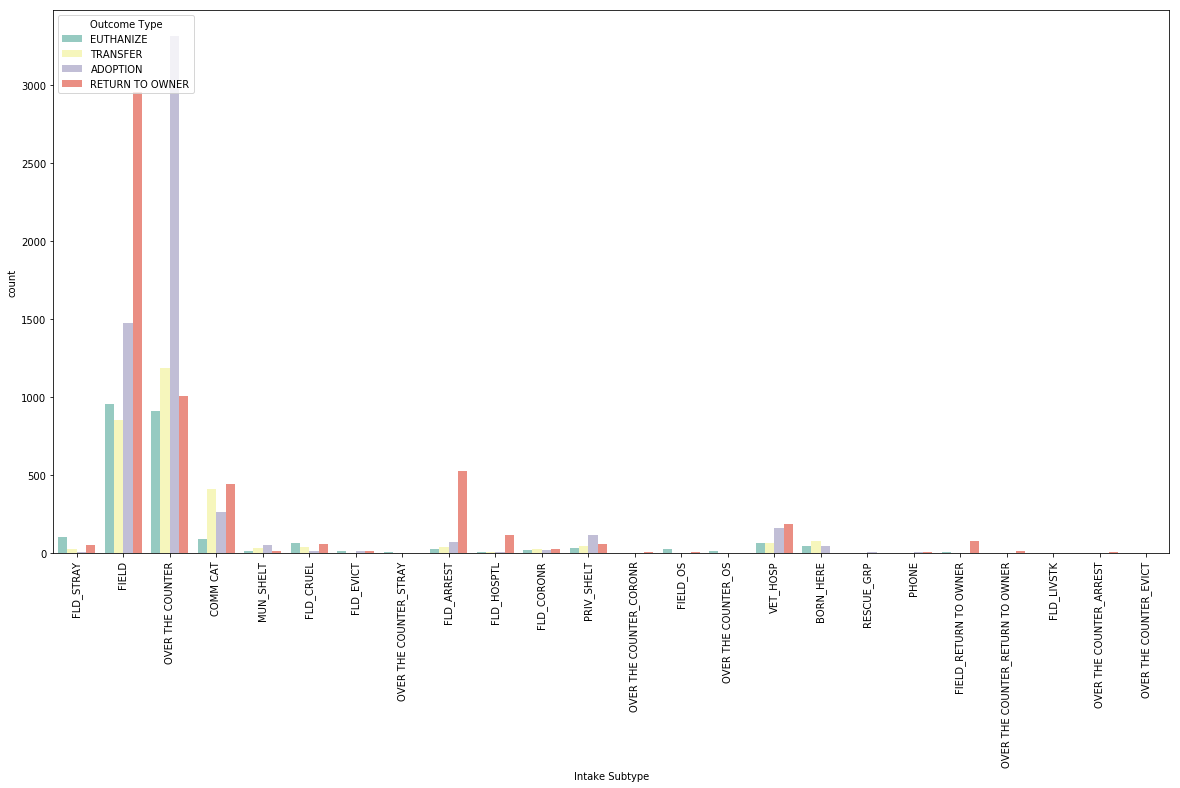

In [645]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data = df, x='Intake Subtype', hue = 'Outcome Type',palette='Set3')

### Size

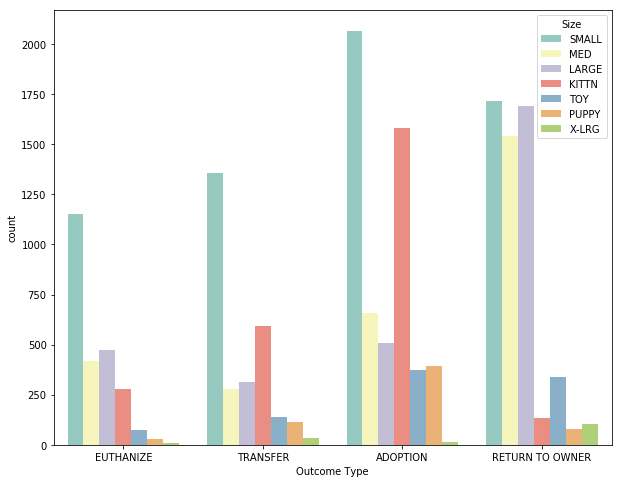

In [654]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Outcome Type', hue = 'Size',palette='Set3')

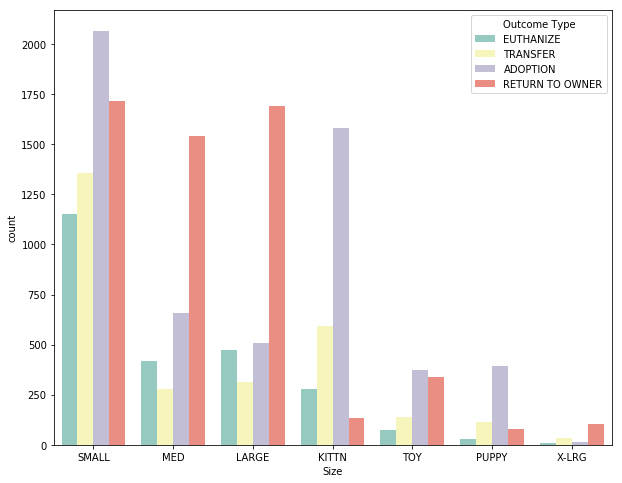

In [655]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Size', hue = 'Outcome Type',palette='Set3')

### Intake Condition

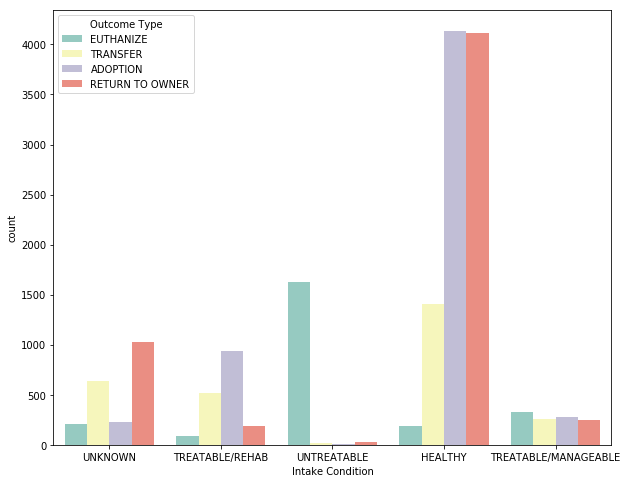

In [456]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='Intake Condition', hue = 'Outcome Type',palette='Set3')

In [640]:
df.head()

,Name,Type,Breed,Color,Sex,Size,Animal ID,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Intake Jurisdiction,PredomBreed,PredomColor,DOB,IntakeDate,IntakeAge,IntakeAgeYrs
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,A384994,0,QUARANTINE,FLD_STRAY,EUTHANIZE,UNKNOWN,*SEBASTOPOL,BAT,BROWN,NaT,2019-03-17,NaT,-1.00
1,NaN,CAT,DOMESTIC SH,CREAM,Female,SMALL,A372719,0,STRAY,FIELD,EUTHANIZE,TREATABLE/REHAB,SANTA ROSA,DOMESTIC SH,CREAM,NaT,2018-05-21,NaT,-1.00
2,NaN,OTHER,BAT,BLACK,Unknown,SMALL,A385008,1,QUARANTINE,FLD_STRAY,EUTHANIZE,UNTREATABLE,SANTA ROSA,BAT,BLACK,NaT,2019-03-18,NaT,-1.00
3,DAISY,CAT,DOMESTIC MH,WHITE/TAN,Spayed,MED,A372551,7,OWNER SURRENDER,OVER THE COUNTER,EUTHANIZE,UNKNOWN,SANTA ROSA,DOMESTIC MH,WHITE,2010-05-15,2018-05-15,2922 days,8.01
4,NaN,CAT,DOMESTIC SH,CALICO/SEAL PT,Female,SMALL,A375772,4,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,SANTA ROSA,DOMESTIC SH,CALICO,2005-09-04,2018-09-04,4748 days,13.01


### Predom Color

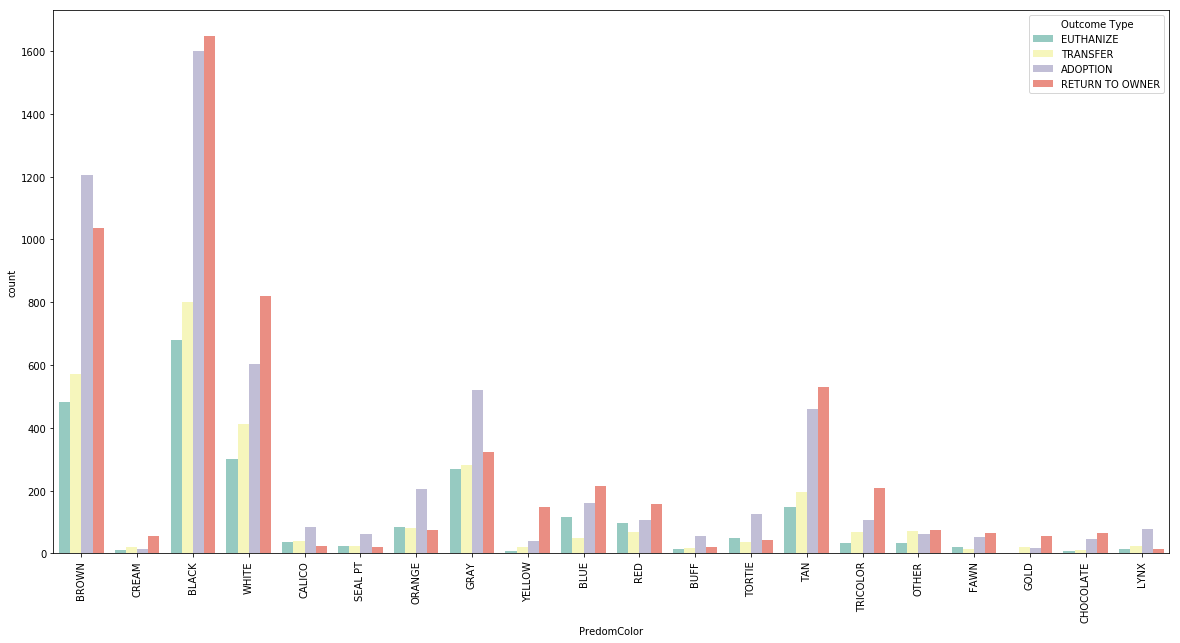

In [643]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data = df, x='PredomColor', hue = 'Outcome Type',palette='Set3')

In [656]:
df.to_csv('cleaned_df.csv')